## Data description

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir

2 - Lodgepole Pine

3 - Ponderosa Pine

4 - Cottonwood/Willow

5 - Aspen

6 - Douglas-fir

7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

link: https://www.kaggle.com/c/forest-cover-type-prediction/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import os, sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/Users/wuraolaifeoluwa/Documents/Rasheed data doc /datasets/forest-cover-type-prediction/train.csv')

test = pd.read_csv('/Users/wuraolaifeoluwa/Documents/Rasheed data doc /datasets/forest-cover-type-prediction/test.csv')

In [3]:
data = train.copy()

In [4]:
data.shape, test.shape

((15120, 56), (565892, 55))

In [5]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [7]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


<AxesSubplot:xlabel='Elevation', ylabel='count'>

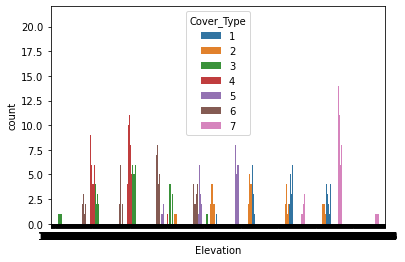

In [8]:
sns.countplot('Elevation',hue='Cover_Type', data=data)

(array([ 363., 1821., 2508., 1769., 2461., 2029., 1797., 2092.,  217.,
          63.]),
 array([1863. , 2061.6, 2260.2, 2458.8, 2657.4, 2856. , 3054.6, 3253.2,
        3451.8, 3650.4, 3849. ]),
 <BarContainer object of 10 artists>)

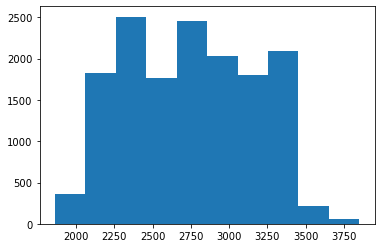

In [9]:
plt.hist(data['Elevation'])

(array([1155., 3015., 3497., 2867., 2126., 1631.,  630.,  160.,   28.,
          11.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <BarContainer object of 10 artists>)

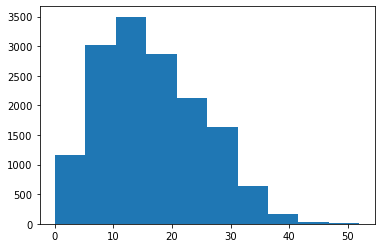

In [10]:
plt.hist(data['Slope'])

In [11]:
data['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [12]:
data['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

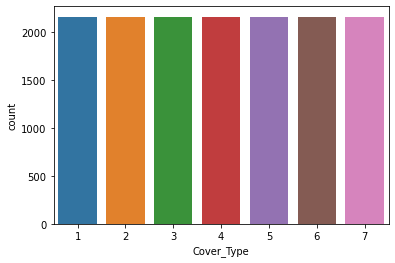

In [13]:
#visualing forest cover
sns.countplot('Cover_Type', data=data)

In [14]:
X = data.drop(['Cover_Type'], axis = 1)
y = data['Cover_Type']

In [15]:
data.shape, test.shape

((15120, 56), (565892, 55))

In [16]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

# evaluating the train data using accuracy score 
print('Training score is :', knn.score(X_train, y_train))

# evaluating the test data using accuracy score 
print('Testing score is :', accuracy_score(pred, y_test))

Training score is : 0.8779289493575207
Testing score is : 0.792989417989418


In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.73      0.66      0.69       646
           2       0.72      0.56      0.63       644
           3       0.78      0.73      0.76       659
           4       0.81      0.92      0.86       642
           5       0.80      0.95      0.87       622
           6       0.81      0.77      0.79       671
           7       0.87      0.96      0.91       652

    accuracy                           0.79      4536
   macro avg       0.79      0.79      0.79      4536
weighted avg       0.79      0.79      0.79      4536



In [23]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5) # GridSearchCV(classifier, parameter, cv)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))



Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 4}
Best score is 0.6816890542221444


In [24]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

pred = Dt.predict(X_test)

# evaluating the train data using accuracy score 
print('Training score is :', Dt.score(X_train, y_train))

# evaluating the test data using accuracy score 
print('Testing score is :', accuracy_score(pred, y_test))

Training score is : 1.0
Testing score is : 0.7713844797178131


In [25]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(n_estimators=70)
rand.fit(X_train,y_train)

# evaluating the train data using accuracy score 
print('Training score is :', rand.score(X_train, y_train))

rand_pred =rand.predict(X_test)
#evaluating test data using accuracy score, classification report and f1 score
print('test score: ',accuracy_score(y_test, rand_pred))

# print('classification_report: ',classification_report(y_test, rand_pred))

print('f1_score: ',f1_score(y_test, rand_pred))

Training score is : 1.0
test score:  0.8622134038800705


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
tree_prediction = tree_cv.predict(test)
rand_prediction = rand.predict(test)

In [ ]:
frame_dict = {}
frame_dict['Id'] = test['Id']
frame_dict['Cover_Type'] = rand_prediction
frame = pd.DataFrame(frame_dict)
frame.to_csv('submission_rand_classifier1.csv', index= False)